# Intro to Data 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#solar=pd.read_csv('deepsolar_tract.csv',encoding = "ISO-8859-1")
#solar.head()

In [691]:
!pip install category_encoders

     |████████████████████████████████| 100 kB 1.9 MB/s ta 0:00:011


## looking at meta file for solar dataset

In [4]:
solar_meta=pd.read_csv('data/deepsolar_tract_meta.csv',encoding = "ISO-8859-1")
l_solar_meta = solar_meta['column_name'].tolist()
num = list(range(168))

In [5]:
for n,i in zip(num,l_solar_meta):
    print(n,i)

0 tile_count
1 solar_system_count
2 total_panel_area
3 fips
4 average_household_income
5 county
6 education_bachelor
7 education_college
8 education_doctoral
9 education_high_school_graduate
10 education_less_than_high_school
11 education_master
12 education_population
13 education_professional_school
14 employed
15 gini_index
16 heating_fuel_coal_coke
17 heating_fuel_electricity
18 heating_fuel_fuel_oil_kerosene
19 heating_fuel_gas
20 heating_fuel_housing_unit_count
21 heating_fuel_none
22 heating_fuel_other
23 heating_fuel_solar
24 land_area
25 per_capita_income
26 population
27 population_density
28 poverty_family_below_poverty_level
29 poverty_family_count
30 race_asian
31 race_black_africa
32 race_indian_alaska
33 race_islander
34 race_other
35 race_two_more
36 race_white
37 state
38 total_area
39 unemployed
40 water_area
41 education_less_than_high_school_rate
42 education_high_school_graduate_rate
43 education_college_rate
44 education_bachelor_rate
45 education_master_rate
46 e

In [6]:
#enter the number for var name and it will give the explanation of it
smeta = solar_meta[[ 'column_name','explanation']]
smeta.style.set_properties(subset=['explanation'], **{'width': '900000px'})
print(smeta.iloc[36])
print(smeta.iloc[48])

column_name          race_white
explanation    number of whites
Name: 36, dtype: object
column_name    race_white_rate
explanation    ratio of whites
Name: 48, dtype: object


In [7]:
solar_meta.head()

,column_name,explanation,source
0,tile_count,number of image tiles containing solar power s...,deepsolar
1,solar_system_count,number of solar power systems (after merging),deepsolar
2,total_panel_area,total area of solar panels (m^2),deepsolar
3,fips,census tract FIPS number,ACS 2015 (5-Year Estimates)
4,average_household_income,average annual houshold income ($),ACS 2015 (5-Year Estimates)


In [9]:
df_solar=pd.read_csv('data/deepsolar_tract.csv',encoding = "ISO-8859-1",index_col=0)
df_solar.head(3)

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,...,39,11,13,34,0,0,25,12,0,9.46
1,25.0,21.0,1133.436461,27145011301,61727.085202,Stearns County,674,1434,108,767,...,39,11,13,34,0,0,25,12,0,9.46
2,3.0,3.0,64.505776,27145011302,71496.886583,Stearns County,854,1459,31,1541,...,39,11,13,34,0,0,25,12,0,9.46


In [10]:
df_solar.shape

(72537, 168)

# EDA

In [11]:
df_lis=pd.read_csv('data/listings.csv',encoding = "ISO-8859-1")

In [12]:
df_lis.latitude

0        40.852054
1        40.853491
2        40.841144
3        40.849775
4        40.850024
           ...    
59819    38.993370
59820    38.951068
59821    38.840824
59822    38.991331
59823    38.885421
Name: latitude, Length: 59824, dtype: float64

In [13]:
##
df_lis.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464


In [14]:
print(df_lis[df_lis['state']=='CA'])

Empty DataFrame
Columns: [accommodates, amenities, availability_30, bathrooms, bed_type, bedrooms, beds, cancellation_policy, city, has_availability, host_id, id, instant_bookable, latitude, longitude, metropolitan, name, price, property_type, review_scores_checkin, review_scores_cleanliness, review_scores_communication, review_scores_location, review_scores_rating, review_scores_value, room_type, state, weekly_price, zipcode]
Index: []

[0 rows x 29 columns]


In [15]:
colns = df_lis.columns.tolist()

In [16]:
datatypes=df_lis.dtypes
for i,j in zip(colns,datatypes):
    print(i,j)

accommodates float64
amenities object
availability_30 int64
bathrooms float64
bed_type object
bedrooms float64
beds float64
cancellation_policy object
city object
has_availability float64
host_id int64
id int64
instant_bookable object
latitude float64
longitude float64
metropolitan object
name object
price float64
property_type object
review_scores_checkin float64
review_scores_cleanliness float64
review_scores_communication float64
review_scores_location float64
review_scores_rating float64
review_scores_value float64
room_type object
state object
weekly_price float64
zipcode object


### common states with solar dataset

In [17]:
states_df_lis = [x.lower() for x in df_lis['state'].unique()]
states_solar = [y for y in df_solar['state'].unique()]
common_states = set(states_df_lis).intersection(set(states_solar))

common_states_sorted = sorted(list(common_states))
common_states_sorted

['co', 'dc', 'il', 'ma', 'md', 'nj', 'ny', 'vt']

In [18]:
sorted(states_df_lis)

['co', 'dc', 'il', 'ma', 'md', 'mp', 'nj', 'ny', 'vt']

In [19]:
df_lis['price'].head(14)

0      99.0
1     200.0
2     300.0
3     125.0
4      69.0
5     125.0
6      85.0
7      39.0
8      95.0
9     125.0
10     85.0
11     85.0
12    130.0
13     45.0
Name: price, dtype: float64

### All variables

In [20]:

colns

['accommodates',
 'amenities',
 'availability_30',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city',
 'has_availability',
 'host_id',
 'id',
 'instant_bookable',
 'latitude',
 'longitude',
 'metropolitan',
 'name',
 'price',
 'property_type',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'room_type',
 'state',
 'weekly_price',
 'zipcode']

### Categorical variables

In [21]:
df_lis[['name','metropolitan','cancellation_policy','bed_type', 'instant_bookable', 'property_type', 'room_type']]

,name,metropolitan,cancellation_policy,bed_type,instant_bookable,property_type,room_type
0,City Island Sanctuary relaxing BR & Bath w Par...,NYC,moderate,Real Bed,f,House,Private room
1,WATERFRONT STUDIO APARTMENT,NYC,flexible,Real Bed,t,Apartment,Private room
2,Quaint City Island Community.,NYC,strict,Real Bed,f,House,Entire home/apt
3,Large 1 BDRM in Great location,NYC,strict,Real Bed,f,Apartment,Entire home/apt
4,Quaint City Island Home,NYC,moderate,Real Bed,t,House,Private room
...,...,...,...,...,...,...,...
59819,Friendly Warm & Clean Atmosphere,dc,flexible,Real Bed,t,Apartment,Private room
59820,Spacious and modern basement suite,dc,flexible,Real Bed,f,Apartment,Entire home/apt
59821,Master room with parking near Metro,dc,strict,Real Bed,t,House,Private room
59822,Modern Condo 5 min from DC,dc,moderate,Real Bed,t,Condominium,Entire home/apt


In [22]:
print('the dataset has', df_lis.shape[1] , 'columns and ',df_lis.shape[0], 'rows') 

the dataset has 29 columns and  59824 rows


#### Check for unique values for categorical variables

In [23]:
cat = ['state','city','metropolitan','cancellation_policy','bed_type', 'instant_bookable', 'property_type', 'room_type']

In [24]:
for i in cat:
    print('unique values in ', i, '\n')
    print(df_lis[i].unique(), '\n')

unique values in  state 

['NY' 'MP' 'NJ' 'VT' 'CO' 'IL' 'MA' 'DC' 'MD'] 

unique values in  city 

['sunnysidebronx' 'long island city' 'queens' 'new york' 'astoria'
 'east elmhurst' nan 'brooklyn' 'ozone park' 'kew gardens' 'whitestone'
 'staten island' 'arverne' 'averne' 'far rockaway' 'rockaway beach' 'lic'
 'bayside' 'oakland gardens' 'bay ridge' 'bedstuy' 'belle harbor'
 'floral park' 'bellerose' 'jamaica' 'briarwood' 'jackson heights'
 'bushwick' 'bk' 'ridgewood' 'cambria heights' 'laurelton' 'rego park'
 'carroll gardens' 'chelsea' 'manhattan' 'flushing' 'college point'
 'bronx ny' 'corona' 'elmhurst' 'elmuhrust' 'woodside' 'fresh meadows'
 'forest hills' 'nyc' 'fort greene' 'auburndale' 'glendale'
 'glendale\nglendale' 'greenpoint' 'manhattan ny' 'harlem'
 "hell's kitchen" 'saint albans' 'hollis' 'howard beach'
 'south ozone park' 'kew gardens hills' 'kips bay' 'l.i.c'
 'longislandcity' 'lower east side' 'maspeth' 'middle village'
 'park slope' 'parkchester bronx' 'parkchester

In [25]:
### explore the cat. variables like:
cat_vis = ['metropolitan','cancellation_policy','bed_type', 'instant_bookable', 'room_type']

In [26]:
df_lis.shape

(59824, 29)

### prices for different room types

In [27]:
## group by room_type: 'Private room' 'Entire home/apt' 'Shared room']
df_lis.groupby(['room_type']).price.mean()

room_type
Entire home/apt    220.585179
Private room        88.830042
Shared room         70.370065
Name: price, dtype: float64

In [718]:
df_lis.groupby(['room_type']).price.median()

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         49.0
Name: price, dtype: float64

### Numerical values

#### Amenitites

##### 'amenities' could be converted to numerical ('amenities_count')

### sample all the amenities from df_lis.amenities column

In [28]:
list_amenities = []
for i in range(len(df_lis.amenities)):
    a = df_lis.amenities[i][1:-1]
    sp_a = [w for w in a.split(',')]
    
        
    list_amenities.append(sp_a)

In [29]:
list_amenities[0]

['"Cable TV"',
 '"Wireless Internet"',
 '"Air conditioning"',
 '"Free parking on premises"',
 'Breakfast',
 '"Pets live on this property"',
 'Cat(s)',
 '"Indoor fireplace"',
 'Heating',
 '"Smoke detector"',
 '"Carbon monoxide detector"',
 '"Fire extinguisher"',
 'Essentials',
 'Shampoo',
 'Hangers',
 '"Hair dryer"',
 'Iron',
 '"translation missing: en.hosting_amenity_49"',
 '"translation missing: en.hosting_amenity_50"']

In [30]:
df_lis.amenities[0]

'{"Cable TV","Wireless Internet","Air conditioning","Free parking on premises",Breakfast,"Pets live on this property",Cat(s),"Indoor fireplace",Heating,"Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'

In [31]:
len(list_amenities)

59824

In [723]:
df_lis.shape

(59824, 29)

In [32]:
## combine all the sublists into one list
from nltk import flatten


total_list_amenities = flatten(list_amenities)

In [33]:
len(total_list_amenities)

966163

In [34]:
## not sorted
total_list_amenities[:9]

['"Cable TV"',
 '"Wireless Internet"',
 '"Air conditioning"',
 '"Free parking on premises"',
 'Breakfast',
 '"Pets live on this property"',
 'Cat(s)',
 '"Indoor fireplace"',
 'Heating']

#### 30 most popular amenities (histogram)

In [35]:
amenities_count = pd.Series(total_list_amenities)

In [36]:
## this is sorted in descending order
amenities_count.value_counts()[:30]

"Wireless Internet"                             57690
Heating                                         56095
Kitchen                                         55844
Essentials                                      50596
"Air conditioning"                              45428
"Smoke detector"                                43697
TV                                              40796
Internet                                        40190
Shampoo                                         38594
Hangers                                         36206
"Carbon monoxide detector"                      33019
Iron                                            31273
Washer                                          30355
Dryer                                           30155
"Laptop friendly workspace"                     29179
"Hair dryer"                                    29045
"Family/kid friendly"                           25876
"translation missing: en.hosting_amenity_50"    21603
"Fire extinguisher"         

#### Plot all the  amenities counts

//anaconda/envs/c1_womens_summit/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda/envs/c1_womens_summit/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda/envs/c1_womens_summit/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
//anaconda/envs/c1_womens_summit/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


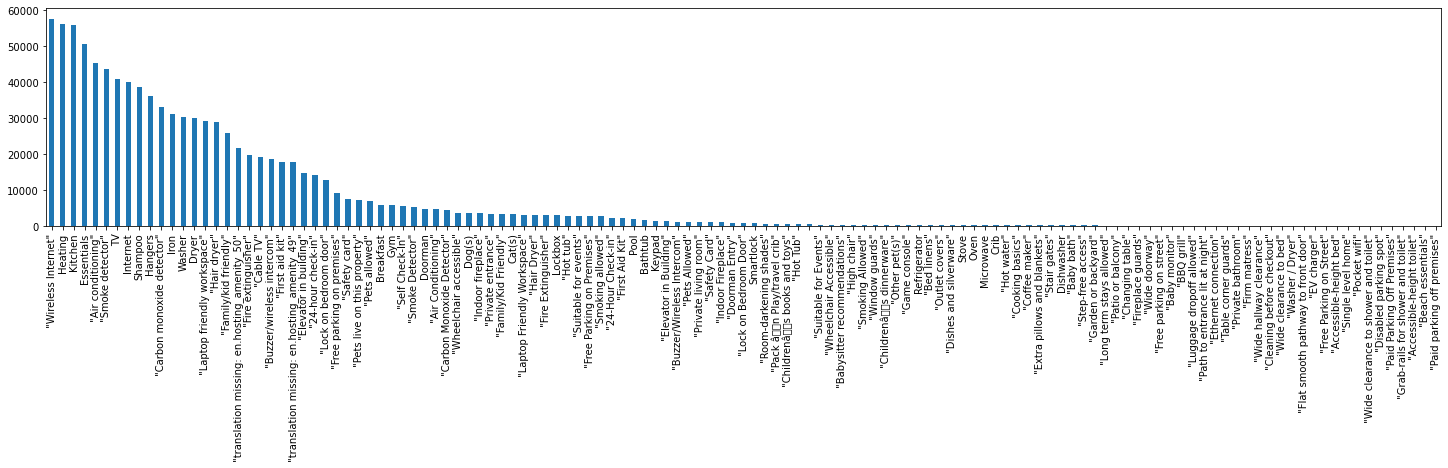

In [37]:

fig = plt.figure(figsize=(25,4))
pd.Series(total_list_amenities).value_counts().plot(kind = 'bar')

##### that looks pretty messy, try this...

#### Plot only 30 top most common amenities counts

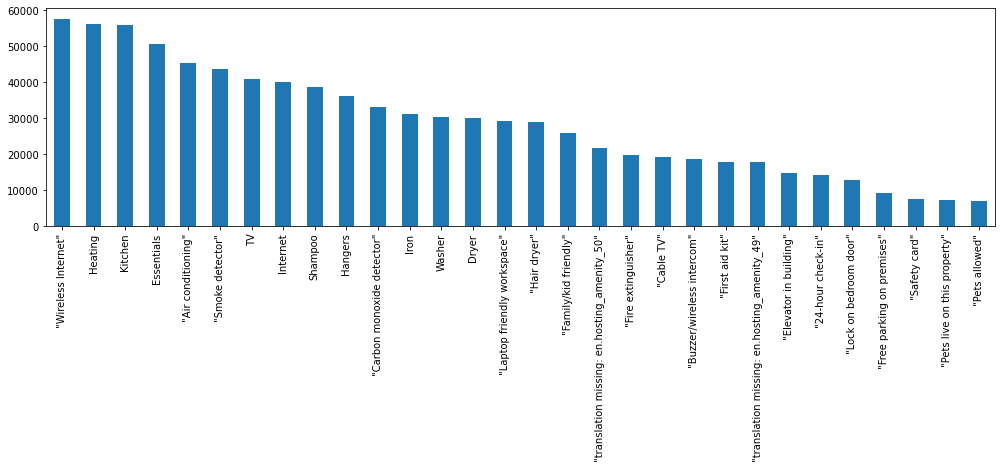

In [38]:
fig = plt.figure(figsize=(17,4))
pd.Series(total_list_amenities).value_counts()[:30].plot(kind = 'bar')

### list of most common 30 amenities

In [39]:
print(pd.Series(total_list_amenities).value_counts()[:30])

"Wireless Internet"                             57690
Heating                                         56095
Kitchen                                         55844
Essentials                                      50596
"Air conditioning"                              45428
"Smoke detector"                                43697
TV                                              40796
Internet                                        40190
Shampoo                                         38594
Hangers                                         36206
"Carbon monoxide detector"                      33019
Iron                                            31273
Washer                                          30355
Dryer                                           30155
"Laptop friendly workspace"                     29179
"Hair dryer"                                    29045
"Family/kid friendly"                           25876
"translation missing: en.hosting_amenity_50"    21603
"Fire extinguisher"         

#### amenties count per listing;

In [40]:
amenities_count = [len(x) for x in list_amenities]

In [43]:
len(list_amenities)

59824

In [44]:
amenities_count[0]

19

In [45]:
list_amenities[0]

['"Cable TV"',
 '"Wireless Internet"',
 '"Air conditioning"',
 '"Free parking on premises"',
 'Breakfast',
 '"Pets live on this property"',
 'Cat(s)',
 '"Indoor fireplace"',
 'Heating',
 '"Smoke detector"',
 '"Carbon monoxide detector"',
 '"Fire extinguisher"',
 'Essentials',
 'Shampoo',
 'Hangers',
 '"Hair dryer"',
 'Iron',
 '"translation missing: en.hosting_amenity_49"',
 '"translation missing: en.hosting_amenity_50"']

### add 'amenities_count'

In [46]:
df_lis['amenities_count'] = amenities_count

In [47]:
df_lis.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,amenities_count
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,19
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,16
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,10
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,18
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,15


### how does the listings with low amenities count look like?

In [48]:
df_lis[df_lis['amenities_count']<=3]

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,amenities_count
30,1.0,{},0,1.0,Real Bed,1.0,1.0,flexible,queens,NaN,...,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,11105,1
31,1.0,"{""Wireless Internet"",Kitchen,Heating}",0,1.0,Real Bed,1.0,1.0,flexible,queens,NaN,...,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,11105,3
55,6.0,"{Kitchen,Washer,Dryer}",4,1.0,Real Bed,0.0,3.0,flexible,queens,NaN,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,11105,3
109,1.0,"{""translation missing: en.hosting_amenity_49""}",0,1.0,Real Bed,1.0,1.0,strict,astoria,NaN,...,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,11105,1
129,2.0,{},0,1.0,Real Bed,1.0,1.0,flexible,queens,NaN,...,NaN,NaN,NaN,NaN,NaN,Private room,NY,900.0,11105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59340,8.0,"{""Wireless Internet"",""Pets allowed"",""Family/ki...",0,3.5,Real Bed,4.0,5.0,strict,washington,NaN,...,10.0,10.0,10.0,100.0,9.0,Entire home/apt,DC,NaN,20002,3
59399,6.0,"{""Pets allowed"",""Family/kid friendly""}",0,2.0,Real Bed,2.0,3.0,flexible,washington,NaN,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,DC,NaN,20003,2
59589,8.0,"{""Family/kid friendly""}",29,1.5,Real Bed,3.0,3.0,flexible,washington,NaN,...,NaN,NaN,NaN,NaN,NaN,Entire home/apt,DC,NaN,20003,1
59669,4.0,"{""Family/kid friendly""}",0,1.0,Real Bed,1.0,1.0,strict,washington,NaN,...,10.0,10.0,10.0,100.0,10.0,Entire home/apt,DC,700.0,20003,1


##### ALL numerical variables

In [49]:
all_num = ['price','accommodates','amenities_count',
 'availability_30',
 'bathrooms',
 'bedrooms',
 'beds',
 'host_id',
 'id',
 'latitude',
 'longitude',
 'price',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'weekly_price',
 'zipcode']

#### Out of them we can exclude host_id, id,zipcode, lon/lat

In [50]:
some_num = ['price','accommodates','amenities_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value']

In [54]:
df_lis[some_num]

,price,accommodates,amenities_count,bathrooms,bedrooms,beds,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
0,99.0,2.0,19,1.0,1.0,1.0,10.0,10.0,10.0,10.0,100.0,10.0
1,200.0,4.0,16,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,300.0,4.0,10,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,125.0,3.0,18,1.0,1.0,1.0,10.0,10.0,10.0,10.0,93.0,10.0
4,69.0,4.0,15,1.0,1.0,1.0,10.0,10.0,10.0,10.0,97.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59819,42.0,2.0,15,1.0,1.0,1.0,9.0,8.0,9.0,8.0,80.0,9.0
59820,155.0,5.0,18,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
59821,75.0,6.0,18,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
59822,115.0,2.0,23,1.0,1.0,1.0,10.0,9.0,10.0,10.0,100.0,10.0


In [55]:
corr = df_lis[some_num].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,accommodates,amenities_count,bathrooms,bedrooms,beds,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
price,1.00,0.37,0.09,0.31,0.33,0.30,-0.01,0.04,-0.01,0.10,0.04,-0.02
accommodates,0.37,1.00,0.28,0.45,0.69,0.81,-0.00,0.04,-0.02,-0.01,-0.00,-0.02
amenities_count,0.09,0.28,1.00,0.18,0.18,0.23,0.11,0.19,0.10,0.11,0.17,0.15
bathrooms,0.31,0.45,0.18,1.00,0.52,0.46,0.00,0.03,-0.01,-0.01,0.03,0.02
bedrooms,0.33,0.69,0.18,0.52,1.00,0.70,0.01,0.03,-0.00,-0.03,0.01,0.00
beds,0.30,0.81,0.23,0.46,0.70,1.00,-0.01,0.03,-0.02,-0.03,-0.02,-0.02
review_scores_checkin,-0.01,-0.00,0.11,0.00,0.01,-0.01,1.00,0.44,0.65,0.33,0.56,0.49
review_scores_cleanliness,0.04,0.04,0.19,0.03,0.03,0.03,0.44,1.00,0.44,0.33,0.71,0.61
review_scores_communication,-0.01,-0.02,0.10,-0.01,-0.00,-0.02,0.65,0.44,1.00,0.34,0.59,0.53
review_scores_location,0.10,-0.01,0.11,-0.01,-0.03,-0.03,0.33,0.33,0.34,1.00,0.45,0.44


In [747]:
corr = df_lis[some_num].corr()
corr

,price,accommodates,amenities_count,bathrooms,bedrooms,beds,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
price,1.000000,0.373245,0.091714,0.306989,0.325093,0.303034,-0.009447,0.037331,-0.010611,0.098297,0.035549,-0.015096
accommodates,0.373245,1.000000,0.283379,0.449273,0.693672,0.811707,-0.000280,0.042027,-0.016474,-0.011616,-0.001467,-0.015070
amenities_count,0.091714,0.283379,1.000000,0.178918,0.179718,0.230351,0.113913,0.193029,0.102859,0.113872,0.170080,0.149304
bathrooms,0.306989,0.449273,0.178918,1.000000,0.518361,0.459165,0.001468,0.028830,-0.013219,-0.005196,0.029656,0.017567
bedrooms,0.325093,0.693672,0.179718,0.518361,1.000000,0.696107,0.009748,0.028179,-0.004773,-0.028507,0.012861,0.000284
beds,0.303034,0.811707,0.230351,0.459165,0.696107,1.000000,-0.007226,0.025307,-0.024312,-0.029916,-0.017618,-0.022185
review_scores_checkin,-0.009447,-0.000280,0.113913,0.001468,0.009748,-0.007226,1.000000,0.439476,0.649108,0.328354,0.559399,0.492445
review_scores_cleanliness,0.037331,0.042027,0.193029,0.028830,0.028179,0.025307,0.439476,1.000000,0.437320,0.326537,0.709640,0.612875
review_scores_communication,-0.010611,-0.016474,0.102859,-0.013219,-0.004773,-0.024312,0.649108,0.437320,1.000000,0.341871,0.594484,0.525514
review_scores_location,0.098297,-0.011616,0.113872,-0.005196,-0.028507,-0.029916,0.328354,0.326537,0.341871,1.000000,0.448423,0.440880


### 'availability_30','bathrooms','bedrooms','beds'

In [56]:
## this will not take into consideration any -inf, inf values that may results from
### log(prce/accomodates) for price == 0
pd.set_option('mode.use_inf_as_na', True)

''

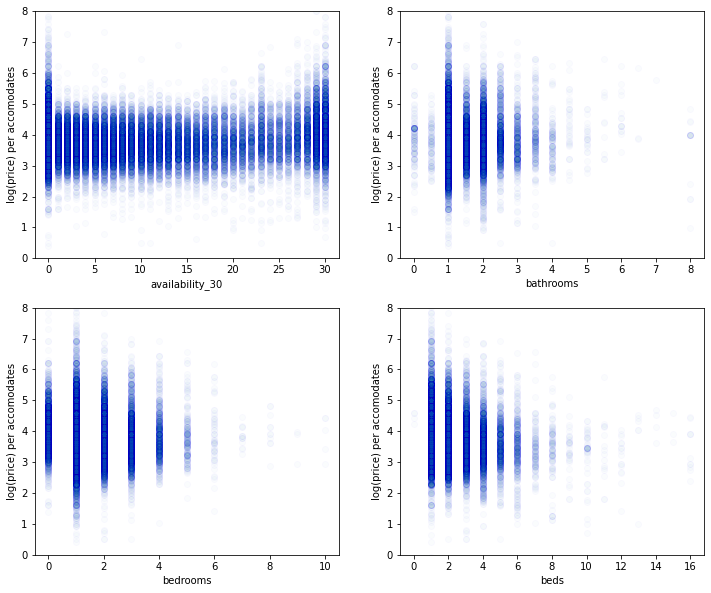

In [58]:
plt.figure(figsize=(12,10))
val = ['availability_30',
 'bathrooms',
 'bedrooms',
 'beds',
 ]
y = np.log(df_lis["price"]/df_lis["accommodates"] )
for i,feature in enumerate(val):
    plt.subplot(2,2,i+1)
    colvalues = df_lis[feature]
    
    
    plt.scatter(colvalues, y, alpha=0.02, edgecolor='blue')
    plt.xlabel(feature)
    plt.ylabel('log(price) per accomodates')
    plt.ylim(0,8)
;

### reviews

''

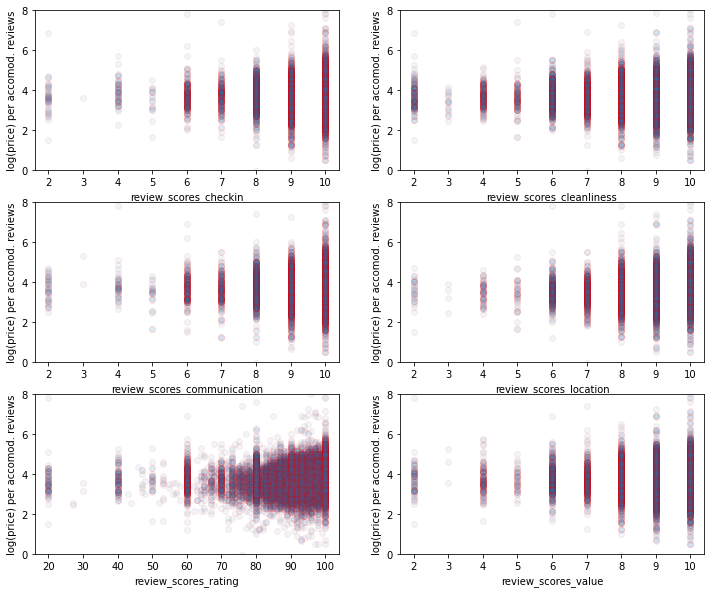

In [59]:
plt.figure(figsize=(12,10))

val = [
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value']
y = np.log(df_lis["price"] / df_lis["accommodates"])
for i,feature in enumerate(val):
    plt.subplot(3,2,i+1)
    colvalues = df_lis[feature]
    
    
    plt.scatter(colvalues, y, alpha=0.07, edgecolor='red')
    plt.xlabel(feature)
    plt.ylabel('log(price) per accomod. reviews')
    plt.ylim(0,8)
    
;

In [60]:
df_lis['log_price_per_acc']=np.log(df_lis["price"] / df_lis["accommodates"])

In [61]:
df_lis.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,amenities_count,log_price_per_acc
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464,19,3.901973
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464,16,3.912023
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,10,4.317488
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,18,3.729701
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464,15,2.847812


### Numerical values correlations with log(price per capita)

In [62]:
price_correlations=[]
for i in df_lis[some_num].columns.tolist()[2:]:
    price_correlations.append((i,df_lis[[i,'log_price_per_acc']].corr()[i]['log_price_per_acc']))
sorted_correlations=sorted(price_correlations,reverse=True,key=lambda k: k[1])
print('top positive correlations: ')
print(sorted_correlations[0:4])
print('top negative correlations: ')
print(sorted_correlations[-4:])

top positive correlations: 
[('review_scores_location', 0.24157591169631765), ('review_scores_rating', 0.09219755501576914), ('review_scores_cleanliness', 0.06405417892786751), ('review_scores_communication', 0.04682868954886535)]
top negative correlations: 
[('bathrooms', 0.01079544504088299), ('amenities_count', -0.06402598923799113), ('bedrooms', -0.07009345813875771), ('beds', -0.1650448311645155)]


In [68]:
sns.set()

Text(18.21, 0.5, 'Price per person accomodated)')

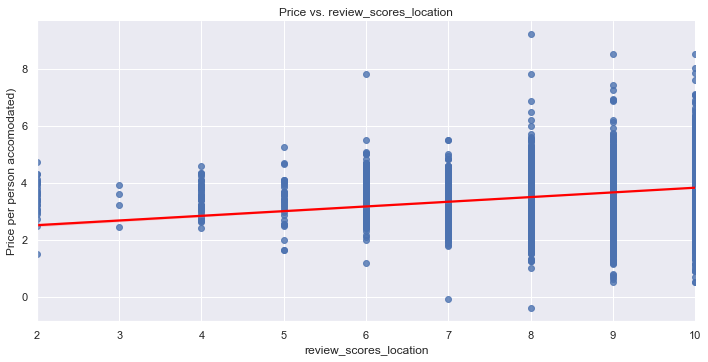

In [69]:
sns.lmplot(x='review_scores_location',y='log_price_per_acc',data=df_lis, 
           line_kws = {'color': "red"} ,aspect= 2)
plt.title("Price vs. review_scores_location")
plt.ylabel('Price per person accomodated)')

Text(18.209999999999994, 0.5, 'Price per person accomodated)')

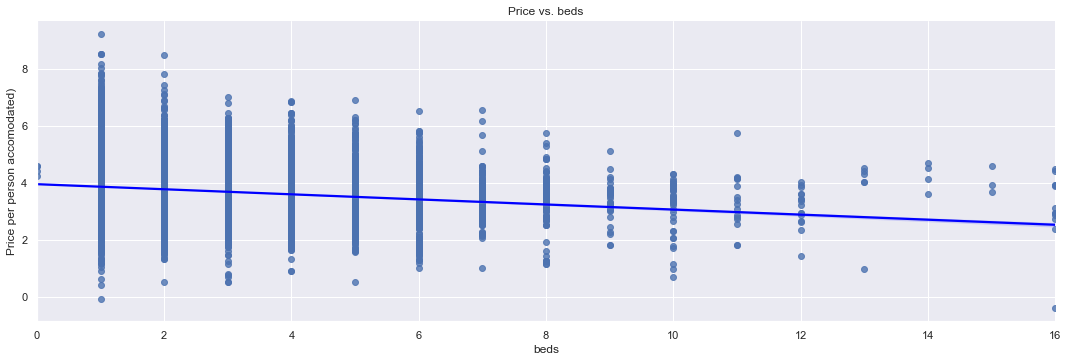

In [70]:
sns.lmplot(x='beds',y='log_price_per_acc',data=df_lis, 
           line_kws = {'color': "blue"} ,aspect= 3)
plt.title("Price vs. beds")
plt.ylabel('Price per person accomodated)')

Text(18.209999999999994, 0.5, 'Price per person accomodated)')

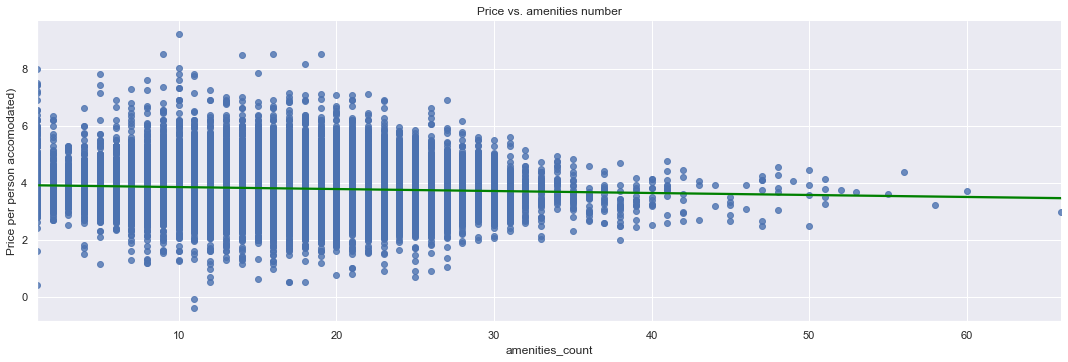

In [756]:
sns.lmplot(x='amenities_count',y='log_price_per_acc',data=df_lis, 
           line_kws = {'color': "green"} ,aspect= 3)
plt.title("Price vs. amenities number")
plt.ylabel('Price per person accomodated)')

### Some 'prices' column valuea are zeroes

In [71]:
df_lis[df_lis['price']==0]

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,amenities_count,log_price_per_acc
43961,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",28,1.0,Real Bed,1.0,1.0,moderate,chicago,NaN,...,NaN,NaN,NaN,NaN,Private room,IL,NaN,60647,18,NaN
44578,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,1.0,1.0,flexible,chicago,NaN,...,10.0,10.0,100.0,10.0,Entire home/apt,IL,NaN,60642,22,NaN
46337,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,1.0,1.0,flexible,chicago,NaN,...,NaN,NaN,NaN,NaN,Entire home/apt,IL,NaN,60657,15,NaN
55868,5.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",24,1.5,Real Bed,2.0,2.0,flexible,washington,NaN,...,NaN,NaN,NaN,NaN,Private room,DC,NaN,20012,26,NaN
59823,2.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",24,1.0,Real Bed,1.0,1.0,flexible,capitol heights,NaN,...,NaN,NaN,NaN,NaN,Private room,MD,NaN,20743,15,NaN


##### when calculated log (price per accomodation),
that becomes inf then converted to NaN

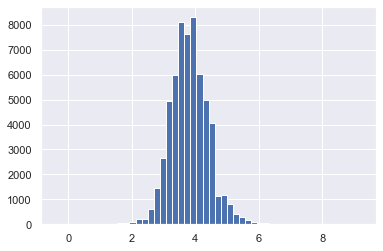

In [72]:
## for histogram drop NaNs
plt.hist(df_lis['log_price_per_acc'].dropna().values, bins = 50);

## Visualize distribution  among cat. variables:
- 'metropolitan',
- 'cancellation_policy',
- 'bed_type',
- 'instant_bookable',
- 'room_type'

In [73]:
df_lis.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'amenities_count', 'log_price_per_acc'],
      dtype='object')

In [74]:
cat_vis

['metropolitan',
 'cancellation_policy',
 'bed_type',
 'instant_bookable',
 'room_type']

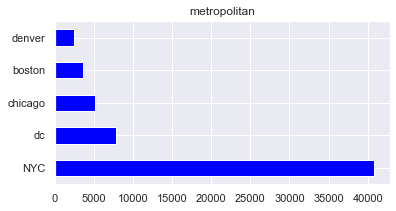

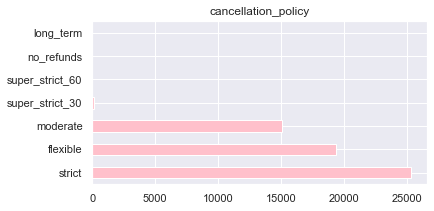

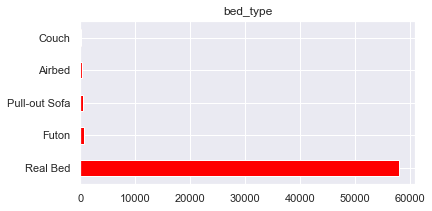

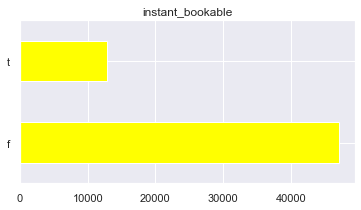

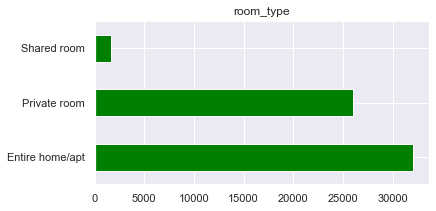

In [75]:
colors = ['blue', 'pink', 'red', 'yellow', 'green']
for name,c in zip(cat_vis,colors):
    plt.figure(figsize=(6,3))
    df_lis[name].value_counts().plot(kind='barh', color = c)
    plt.title(name)
    plt.show()

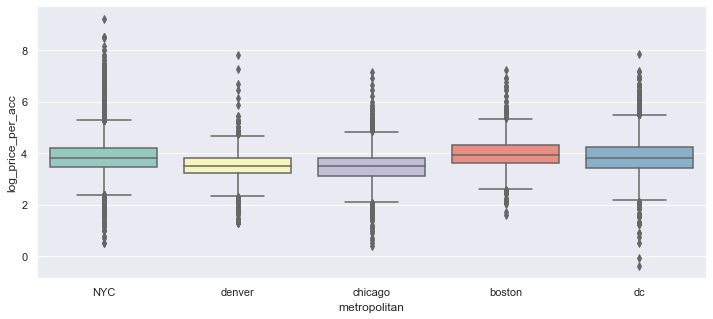

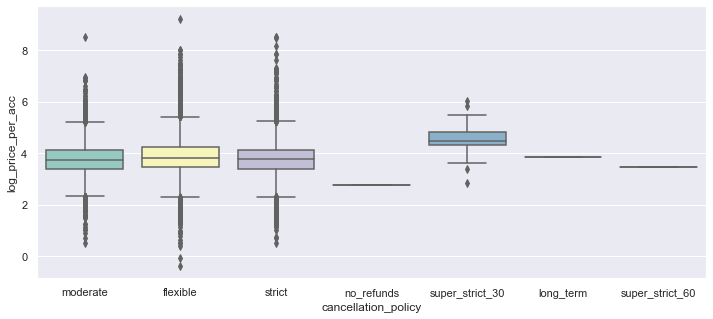

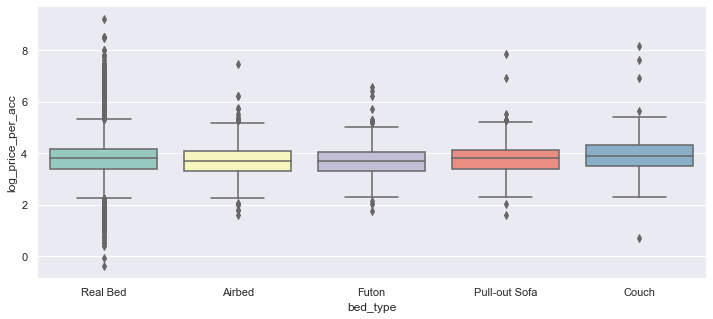

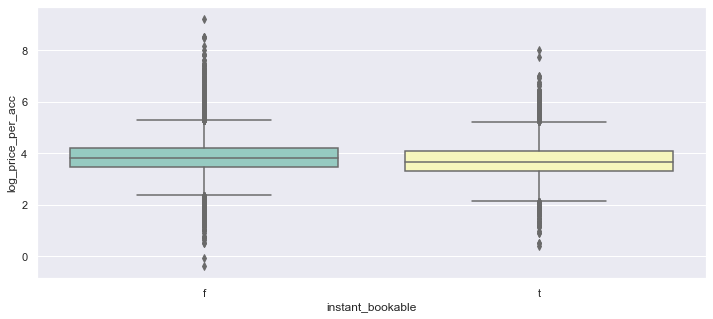

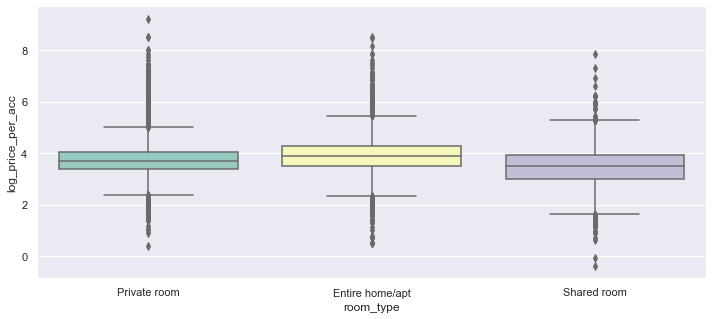

In [76]:
sns.set()

for name in cat_vis:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=name, y="log_price_per_acc", data=df_lis, palette="Set3")
    
    plt.show()

### Explore corr. when combined numerical values and one-hot encoded categorical variables

In [77]:
df_lis_copy = df_lis.copy()

In [78]:
df_lis_copy.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode', 'amenities_count', 'log_price_per_acc'],
      dtype='object')

#### here it is possible to categorize listings that have certain amenities as 'yes' or 'No' and hot-encode them too.

In [ ]:
#print(pd.Series(total_list_amenities).value_counts()[:30])

In [79]:
## drop the 'amenities', 'name', 'zipcode' columns:
df_lis_copy.drop(['amenities','name', 'zipcode'], axis = 1,inplace = True)

In [80]:
df_lis_copy.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bed_type', 'bedrooms',
       'beds', 'cancellation_policy', 'city', 'has_availability', 'host_id',
       'id', 'instant_bookable', 'latitude', 'longitude', 'metropolitan',
       'price', 'property_type', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'room_type', 'state', 'weekly_price', 'amenities_count',
       'log_price_per_acc'],
      dtype='object')

In [81]:
type(df_lis_copy)

pandas.core.frame.DataFrame

In [82]:
cat

['state',
 'city',
 'metropolitan',
 'cancellation_policy',
 'bed_type',
 'instant_bookable',
 'property_type',
 'room_type']

In [83]:

import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat, use_cat_names=True)
df_lis_copy_big = encoder.fit_transform(df_lis_copy)

In [84]:
df_lis_copy_big.columns

Index(['accommodates', 'availability_30', 'bathrooms', 'bed_type_Real Bed',
       'bed_type_Airbed', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Couch', 'bedrooms', 'beds',
       ...
       'state_NJ', 'state_VT', 'state_CO', 'state_IL', 'state_MA', 'state_DC',
       'state_MD', 'weekly_price', 'amenities_count', 'log_price_per_acc'],
      dtype='object', length=218)

In [86]:
price_corr_all=[]
for i in df_lis_copy_big.columns.tolist():
    price_corr_all.append((i,df_lis_copy_big[[i,'log_price_per_acc']].corr()[i]['log_price_per_acc']))
sorted_corr=sorted(price_corr_all[:-1],reverse=True,key=lambda k: k[1])
print('top positive correlations: ')
print(sorted_corr[0:4])
print('top negative correlations: ')
print(sorted_corr[-4:])

top positive correlations: 
[('city_new york', 0.27197478514994194), ('cancellation_policy_flexible', 0.07744134927369961), ('availability_30', 0.0676843846265119), ('cancellation_policy_super_strict_30', 0.06456150964567405)]
top negative correlations: 
[('room_type_Private room', -0.1363272879477675), ('city_chicago', -0.17323987872617788), ('metropolitan_chicago', -0.17388822893041125), ('state_IL', -0.17388822893041125)]


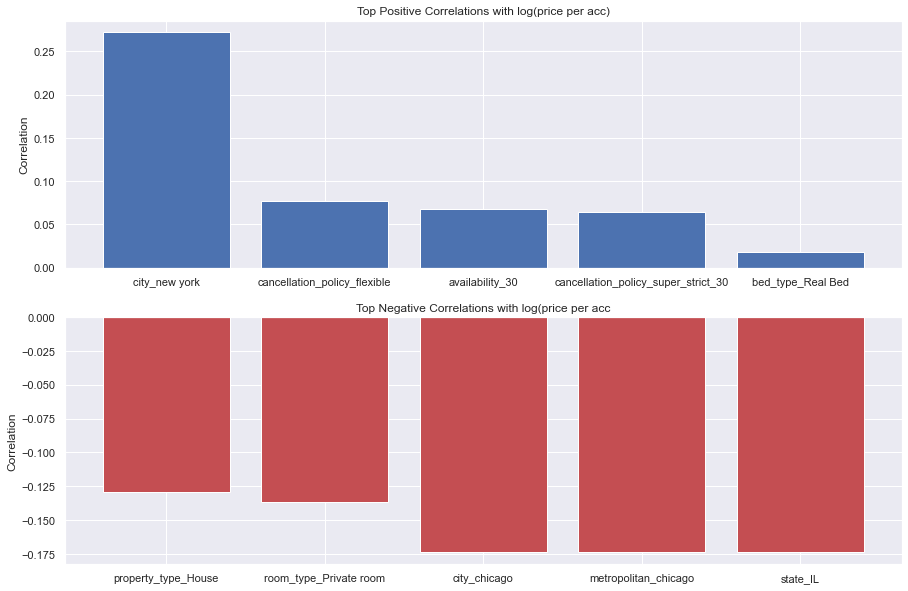

In [87]:
fig,ax=plt.subplots(2,1,figsize=(15,10))

bottom_corr=sorted_corr[-5:]
top_corr=sorted_corr[0:5]

index=np.arange(5)

top_corrs=[i[1] for i in top_corr]
top_labels=[i[0] for i in top_corr]

bottom_corrs=[i[1] for i in bottom_corr]
bottom_labels=[i[0] for i in bottom_corr]


ax[0].bar(index,top_corrs)
ax[0].set_xticks(index)
ax[0].set_xticklabels(top_labels)
ax[0].set_title('Top Positive Correlations with log(price per acc)')
ax[0].set_ylabel('Correlation')


ax[1].bar(index,bottom_corrs,color='r')
ax[1].set_xticks(index)
ax[1].set_xticklabels(bottom_labels)
ax[1].set_title('Top Negative Correlations with log(price per acc')
ax[1].set_ylabel('Correlation')

plt.show()

In [99]:
sorted_corr

[('city_new york', 0.27197478514994194),
 ('cancellation_policy_flexible', 0.07744134927369961),
 ('availability_30', 0.0676843846265119),
 ('cancellation_policy_super_strict_30', 0.06456150964567405),
 ('bed_type_Real Bed', 0.017811651476953932),
 ('bathrooms', 0.01079544504088299),
 ('city_chelsea', 0.0099836462351068),
 ('bed_type_Couch', 0.008181795357314114),
 ('city_yonkers', 0.005842202314109993),
 ('city_kips bay', 0.005328685313220603),
 ('city_riverdale', 0.0052315777048981445),
 ('city_bk', 0.0042001618514129055),
 ('city_fort greene', 0.004144402763631384),
 ('city_college point', 0.003830122611862871),
 ('city_valley stream', 0.003822542982739495),
 ('city_bellerose', 0.0034164196477623225),
 ('city_lower east side', 0.003396701972958261),
 ('city_greenpoint', 0.003061908550648699),
 ('city_carroll gardens', 0.002624663282862004),
 ('city_winhall', 0.0024356812060567726),
 ('city_manhattan', 0.002394913984663177),
 ('city_red hook', 0.0022788875696067206),
 ('city_auburnda

## Check if we have NaNs

In [88]:
##
df_lis.isna().values.any()

True

In [89]:
total_nan = 0
no_nan = []
less_100_nan = []
over_100_nan = []
for i in df_lis.columns:
    nn = df_lis[i].isna().sum()
    if nn==0:
        col_1 = (i,nn)
        no_nan.append(col_1)
    if nn > 0 and nn<=100:
        col_2 = (i,nn)
        less_100_nan.append(col_2)
    if nn>100:
        col_3 = (i,nn)
        over_100_nan.append(col_3)
        
        
#print('column ',i,'has', df_lis[i].isna().sum(),'NaNs')
total_nan += df_lis[i].isna().sum() 
print('Total NaN found', total_nan)

Total NaN found 66


In [90]:
print('columns with no missing values','\n', [k[0] for k in no_nan])


columns with no missing values 
 ['amenities', 'availability_30', 'bed_type', 'cancellation_policy', 'host_id', 'id', 'instant_bookable', 'latitude', 'longitude', 'metropolitan', 'price', 'room_type', 'state', 'amenities_count']


In [91]:
df_less_100_nan = pd.DataFrame({'column':[k[0] for k in less_100_nan],'NaN count':[k[1] for k in less_100_nan] })

In [92]:
print('less than 100 NaNs', '\n',df_less_100_nan.sort_values(by = 'NaN count'))

less than 100 NaNs 
               column  NaN count
4      property_type          4
3               name         41
2               city         46
0       accommodates         61
5  log_price_per_acc         66
1           bedrooms         95


In [93]:
df_many_nan = pd.DataFrame({'column':[k[0] for k in over_100_nan],'NaN count':[k[1] for k in over_100_nan] })

In [94]:
print('over 100 NaNs', '\n',df_many_nan.sort_values(by = 'NaN count'))

over 100 NaNs 
                          column  NaN count
1                          beds        109
0                     bathrooms        202
10                      zipcode        826
7          review_scores_rating      14200
4     review_scores_cleanliness      14280
5   review_scores_communication      14285
3         review_scores_checkin      14346
6        review_scores_location      14349
8           review_scores_value      14354
9                  weekly_price      46386
2              has_availability      59824


In [95]:
## total missing values
df_lis.isna().sum().sum()

193474

In [97]:
df_lis.describe()

,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,host_id,id,latitude,longitude,price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,weekly_price,amenities_count,log_price_per_acc
count,59763.000000,59824.000000,59622.000000,59729.000000,59715.000000,0.0,5.982400e+04,5.982400e+04,59824.000000,59824.000000,59824.000000,45478.000000,45544.000000,45539.000000,45475.000000,45624.000000,45470.000000,13438.000000,59824.000000,59758.000000
mean,3.031960,7.976448,1.183447,1.221969,1.626107,NaN,3.100695e+07,1.007171e+07,40.651362,-76.674881,159.009378,9.738555,9.289786,9.758624,9.463002,93.474750,9.384891,856.471201,16.150090,3.811702
std,1.999427,10.062641,0.483726,0.775982,1.128178,NaN,3.216733e+07,5.507015e+06,0.862090,7.139989,236.200222,0.662886,1.066889,0.645440,0.818924,8.240908,0.874256,712.856777,5.632576,0.609142
min,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,7.200000e+01,5.900000e+02,38.823403,-105.094563,0.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,70.000000,1.000000,-0.374693
25%,2.000000,0.000000,1.000000,1.000000,1.000000,NaN,5.453285e+06,5.477726e+06,40.673848,-76.981725,70.000000,10.000000,9.000000,10.000000,9.000000,90.000000,9.000000,450.000000,12.000000,3.401197
50%,2.000000,3.000000,1.000000,1.000000,1.000000,NaN,1.965590e+07,1.022793e+07,40.722133,-73.972984,109.000000,10.000000,10.000000,10.000000,10.000000,96.000000,10.000000,675.000000,16.000000,3.795489
75%,4.000000,13.000000,1.000000,1.000000,2.000000,NaN,4.667932e+07,1.505785e+07,40.791820,-73.942720,176.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,1000.000000,20.000000,4.174387
max,16.000000,30.000000,8.000000,10.000000,16.000000,NaN,1.297105e+08,1.867079e+07,42.389982,-71.000100,10000.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,14000.000000,66.000000,9.210140


In [32]:
datatypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)